In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline
from matplotlib import pyplot as plt

# Datasource: US Census.gov

### - Employment data by County
#### -- county (county/state)
#### -- labor_force
#### -- employed
#### -- unemployed_pct

### - Demographic population and race data by County

#### -- county (county/state)
#### -- population
#### -- race_white
#### -- race_black
#### -- race_native
#### -- race_asian
#### -- race_islander
#### -- race_other
#### -- race_two_or_more

---

# This model uses these X columns:
---
#### - race_white
#### - race_black
#### - race_asian
#### - race_other (combined race_other, race_islander, race_native)
#### - race_two_or_more

---

## To Predict one of these Y column:

# labor_force
# employed
# unemployed

---

There are sample tests way at the bottom that simulates simulate the response the user would get if we were to provide them with a form for them to enter in values and hit submit. 

The tests below shows you the "change" in labor_force.


---

In [2]:
employment_county_df  = pd.read_csv('../data_files/Employment_by_County.csv', index_col=0)
employment_county_df.head(5)

,geoid,county,labor_force,employed,unemployed,unemployed_pct,population,race_white,race_black,race_native,race_asian,race_islander,race_other,race_two_or_more
0,1001,"Autauga County, Alabama",25838,24576,1262,4.9,58805,42160,11445,217,881,35,910,3157
2,1003,"Baldwin County, Alabama",96763,91338,5425,5.6,231767,189399,18217,1582,2067,143,5335,15024
4,1005,"Barbour County, Alabama",8587,7982,605,7.0,25223,11317,11933,116,117,1,1039,700
6,1007,"Bibb County, Alabama",8640,8067,573,6.6,22293,16555,4413,60,32,9,465,759
8,1009,"Blount County, Alabama",24661,23653,1008,4.1,59134,50663,845,337,178,24,3431,3656


# Copy of the dataframe to feed ML 



In [3]:
employment_county_copy = employment_county_df.copy()

In [4]:
employment_county_copy.columns.to_list()

['geoid',
 'county',
 'labor_force',
 'employed',
 'unemployed',
 'unemployed_pct',
 'population',
 'race_white',
 'race_black',
 'race_native',
 'race_asian',
 'race_islander',
 'race_other',
 'race_two_or_more']

In [5]:
employment_county_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3125 entries, 0 to 3191
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   geoid             3125 non-null   int64  
 1   county            3125 non-null   object 
 2   labor_force       3125 non-null   int64  
 3   employed          3125 non-null   int64  
 4   unemployed        3125 non-null   int64  
 5   unemployed_pct    3125 non-null   float64
 6   population        3125 non-null   int64  
 7   race_white        3125 non-null   int64  
 8   race_black        3125 non-null   int64  
 9   race_native       3125 non-null   int64  
 10  race_asian        3125 non-null   int64  
 11  race_islander     3125 non-null   int64  
 12  race_other        3125 non-null   int64  
 13  race_two_or_more  3125 non-null   int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 366.2+ KB


In [6]:
employment_county_copy['race_others']= employment_county_copy[['race_native','race_islander','race_other']].sum(axis=1)
employment_county_copy.head(5)

,geoid,county,labor_force,employed,unemployed,unemployed_pct,population,race_white,race_black,race_native,race_asian,race_islander,race_other,race_two_or_more,race_others
0,1001,"Autauga County, Alabama",25838,24576,1262,4.9,58805,42160,11445,217,881,35,910,3157,1162
2,1003,"Baldwin County, Alabama",96763,91338,5425,5.6,231767,189399,18217,1582,2067,143,5335,15024,7060
4,1005,"Barbour County, Alabama",8587,7982,605,7.0,25223,11317,11933,116,117,1,1039,700,1156
6,1007,"Bibb County, Alabama",8640,8067,573,6.6,22293,16555,4413,60,32,9,465,759,534
8,1009,"Blount County, Alabama",24661,23653,1008,4.1,59134,50663,845,337,178,24,3431,3656,3792


In [7]:
# reducing columns to improve model performance 
employment_county_copy = employment_county_copy.drop(['race_native','race_islander','race_other'],axis=1)

In [8]:
employment_county_copy.isnull().values.any()

False

In [9]:
employment_county_copy.shape

(3125, 12)

In [10]:
employment_county_copy.columns.to_list()

['geoid',
 'county',
 'labor_force',
 'employed',
 'unemployed',
 'unemployed_pct',
 'population',
 'race_white',
 'race_black',
 'race_asian',
 'race_two_or_more',
 'race_others']

In [11]:
employment_county_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3125 entries, 0 to 3191
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   geoid             3125 non-null   int64  
 1   county            3125 non-null   object 
 2   labor_force       3125 non-null   int64  
 3   employed          3125 non-null   int64  
 4   unemployed        3125 non-null   int64  
 5   unemployed_pct    3125 non-null   float64
 6   population        3125 non-null   int64  
 7   race_white        3125 non-null   int64  
 8   race_black        3125 non-null   int64  
 9   race_asian        3125 non-null   int64  
 10  race_two_or_more  3125 non-null   int64  
 11  race_others       3125 non-null   int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 317.4+ KB


# Targeting "labor_force" but we can target any of the employment columns

- labor_force
- employed
- unemployed_pct

In [12]:
X = employment_county_copy[['race_white', 'race_black', 'race_asian', 'race_two_or_more', 'race_others']]
y = employment_county_copy['labor_force'] 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=0)

In [14]:
regressor = RandomForestRegressor(n_estimators=10,random_state=0)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [15]:
y_pred = regressor.predict(X_test)

In [18]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9808327818575827

In [19]:
regressor.score(X_train,y_train)

0.9756797782440916

In [20]:
regressor.score(X_test,y_test)

0.9808327818575827

In [21]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mae

4423.9664

## Feature importance

In [23]:
sorted(zip(regressor.feature_importances_, X.columns), reverse=True)

[(0.5845257307770042, 'race_white'),
 (0.20918184329404005, 'race_two_or_more'),
 (0.10531549717435326, 'race_asian'),
 (0.06333469709843384, 'race_black'),
 (0.03764223165616864, 'race_others')]

### MAE seem a bit high, but consider the min max range

In [24]:
max_labor_force = employment_county_df['labor_force'].max()
min_labor_force = employment_county_df['labor_force'].min()
print ('min = ', min_labor_force)
print('max = ', max_labor_force)

min =  184
max =  4921499


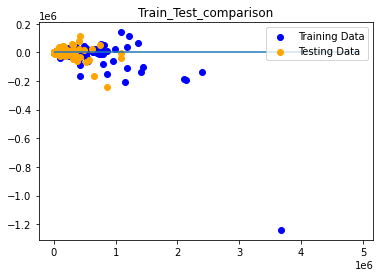

In [25]:
plt.scatter(regressor.predict(X_train), regressor.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(regressor.predict(X_test), regressor.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Train_Test_comparison")
plt.show()

In [26]:
print(f'Actual:\t\t{list(y_test[:10])}')
print(f'Predicted:\t{list(regressor.predict(X_test[:10]))}')

Actual:		[5008, 3075, 28305, 27311, 9649, 20710, 15909, 136480, 5561, 13659]
Predicted:	[5178.6, 3277.1, 28422.4, 25899.3, 9625.8, 21722.4, 18502.6, 133694.6, 5313.1, 12604.8]


# START MODEL TESTING

- A random row was selected to use as baseline values for comparison
- Ran the prediction 5 times
 - each time changing the population of a race by N
- Prints out the change in labor_force

### Ignore block below - wip testing

In [119]:
test1 = employment_county_df[employment_county_df['county']=='Autauga County, Alabama']
test1 = test1[['race_white', 'race_black', 'race_asian', 'race_other', 'race_native', 'race_islander', 'race_two_or_more']].copy()
test1['race_others']= test1[['race_native','race_islander','race_other']].sum(axis=1)
test1.drop(columns=['race_other', 'race_native', 'race_islander'], inplace=True)
test1[:1]

,race_white,race_black,race_asian,race_two_or_more,race_others
0,42160,11445,881,3157,1162


---

# TEST A : Start with a random Baseline as reference

In [123]:
X_test[11:12]

,race_white,race_black,race_asian,race_two_or_more,race_others
3047,82665,4811,1345,4642,887


In [125]:
baselineA = regressor.predict(X_test[11:12])[0]
print (f"TEST A : Baseline labor_force before change {baselineA}")

TEST A : Baseline labor_force before change 47439.7


# Change in labor_force when 500 to each race

In [128]:
# increase white by 500
prediction = regressor.predict([[84665,4811,1345,4642,887]])[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineA}")

Predict labor_force to be 47200.5, a change of -239.1999999999971


In [90]:
# increase black by 500
prediction = regressor.predict([[7448,2898,108,1279,1731]])[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineA}")

Predict labor_force to be 5175.8, a change of -2.800000000000182


In [91]:
# increase asian by 500
prediction = regressor.predict([[7448,1898,608,1279,1731]])[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineA}")

Predict labor_force to be 5847.0, a change of 668.3999999999996


In [92]:
# increase race_two_or_more by 500
prediction = regressor.predict([[7448,1898,108,1779,1731]])[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineA}")

Predict labor_force to be 5605.6, a change of 427.0


In [93]:
# increase race_others by 500
prediction = regressor.predict([[7448,1898,108,1279,3231]])[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineA}")

Predict labor_force to be 6279.8, a change of 1101.1999999999998


# TEST B : Start with a random Baseline as reference

In [130]:
(X_test[258:259])

,race_white,race_black,race_asian,race_two_or_more,race_others
1659,1474,0,13,129,45


In [53]:
baselineB = regressor.predict(X_test[4:5])[0]
print (f"TEST B : Baseline labor_force = {baselineB}")

TEST B : Baseline labor_force = 9625.8


## Change in labor_force when adding 1000 to each race

Case: County is predominately Black

In [54]:
# increase white by 1000
prediction = regressor.predict([[226462,208273,10703,24666,13893]])[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineB}")

Predict labor_force to be 201139.5, a change of 191513.7


In [37]:
# increase black by 1000
prediction = regressor.predict([[126462,268273,10703,24666,13893]])[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineB}")

Predict labor_force to be 163250.0, a change of 153624.2


In [38]:
# increase asian by 1000
prediction = regressor.predict([[126462,208273,20703,24666,13893]])[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineB}")

Predict labor_force to be 177845.9, a change of 168220.1


In [39]:
# increase race_two_or_more by 1000
prediction = regressor.predict([[126462,208273,10703,34666,13893]])[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineB}")

Predict labor_force to be 164638.5, a change of 155012.7


In [40]:
# increase race_others by 1000
prediction = regressor.predict([[126462,208273,10703,24666,23893]])[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineB}")

Predict labor_force to be 161305.2, a change of 151679.40000000002


# TEST C : Start with a random Baseline as reference

In [41]:
(X_test[347:348])

,race_white,race_black,race_asian,race_two_or_more,race_others
2938,44672,12417,292,2129,991


In [42]:
baselineC = regressor.predict(X_test[347:348])[0]
print (f"TEST C : Baseline labor_force = {baselineC}")

TEST C : Baseline labor_force = 25340.9


## Change in labor_force when 1000 to each race

In [43]:
# increase white by 1000
prediction = regressor.predict([[45672,12417,292,2129,991]])[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineC}")

Predict labor_force to be 25394.3, a change of 53.39999999999782


In [44]:
# increase black by 1000
prediction = regressor.predict([[44672,35417,292,2129,991]])[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineC}")

Predict labor_force to be 28681.5, a change of 3340.5999999999985


In [45]:
# increase asian by 1000
prediction = regressor.predict([[44672,12417,1292,2129,991]])[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineC}")

Predict labor_force to be 26078.8, a change of 737.8999999999978


In [46]:
# increase race_two_or_more by 1000
prediction = regressor.predict([[44672,12417,292,3129,991]])[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineC}")

Predict labor_force to be 25452.9, a change of 112.0


In [47]:
# increase race_others by 1000
prediction = regressor.predict([[44672,12417,292,2129,1991]])[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineC}")

Predict labor_force to be 25889.5, a change of 548.5999999999985
